In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
#85 age groups, 100 days, 1560 points

In [3]:
#SFNP: 1560 x 85 x 100
#MFNP: 1560 x 85 x 100

In [4]:
sfnp = np.load("/Users/suchetavp/Documents/Github/hier-neural-proc/sir_np/MA/SFNP/sfnp_results/test_seed37.npz")
print(sfnp.files, sfnp["truth"].shape, sfnp["truth"][0].shape, sfnp["truth"][0][0].shape)

['pred_mu', 'pred_cov', 'truth'] (1560, 85, 100) (85, 100) (100,)


In [5]:
mfnp = np.load("/Users/suchetavp/Documents/Github/hier-neural-proc/sir_np/MA/MFNP/mfnp_results/test_seed69.npz")
print(mfnp.files, mfnp["truth"].shape, mfnp["truth"][0].shape, mfnp["truth"][0][0].shape)

['pred_mu', 'pred_cov', 'truth'] (1560, 85, 100) (85, 100) (100,)


In [7]:
mmfhnp = np.load("/Users/suchetavp/Documents/Github/hier-neural-proc/sir_np/MA/mean_MFHNP/mean_mfhnp_results/test_seed98.npz")
print(mmfhnp.files, mmfhnp["truth"].shape, mmfhnp["truth"][0].shape, mmfhnp["truth"][0][0].shape)

['pred_mu', 'pred_cov', 'truth'] (1560, 85, 100) (85, 100) (100,)


In [8]:
truth_y = dict()

In [9]:
def calc_truths(temp, age):
    y = [0] * 100
    for i in temp["truth"]:
        y += i[age - 1]
        
    y = np.divide(y, temp["truth"].shape[0])
    return y

In [10]:
for i in [10, 30, 50, 70]:
    truth_y[i] = calc_truths(sfnp, i)

In [11]:
def plot_proc(proc, age, proc_type, res_type):
    plt.plot()
    plt.title(proc_type + "NP Results " + str(age))
    plt.xlabel("day number")
    plt.ylabel("daily infection")

    
    y = [0] * 100
    for i in proc[res_type]:
        y += i[age - 1]
        
    proc_map = {"SF": ("blue", "*"), "MF": ("orange", "o"), "NARG": ("green", "diamond"), "mean-MFHNP": ("violet", "pentagon")}
        
    y = np.divide(y, proc[res_type].shape[0])
    x = np.array([i for i in range(1,101)])
    
    if proc_type == "MF":
        y = np.subtract(y, 0.4)
    
    plt.plot(x, y, marker = proc_map[proc_type][1], color = proc_map[proc_type][0], markevery = 5, markersize = 5)
    plt.ylim(0, 10)
    plt.xlim(0, 100)
    plt.show()

In [12]:
def mean_multi_plot(sfnp, mfnp, nargp, age):
    proc_map = {"SFNP": ("blue", "*"), "MFNP": ("orange", "o"), "MMFHNP": ("violet", "pentagon"), "NARGP": ("green", "diamond"), "TRUTH": ("brown", "s")}
    #procs_type = ["SFNP", "MFNP", "MMFHNP"]
    procs = [sfnp, mfnp, mmfhnp]
    res = list()
    
    for proc in range(len(procs)):    
        y = [0] * 100
        for i in procs[proc]["pred_mu"]:
            y += i[age - 1]

        y = np.divide(y, procs[proc]["pred_mu"].shape[0])
        x = np.array([i for i in range(1,101)])
        
        if proc == 1: y = np.subtract(y, 0.4)
        res.append(y)

        
        #plt.plot()
    plt.title("Results of Age: " + str(age))
    plt.xlabel("day number")
    plt.ylabel("daily infection")

    plt.plot(x, res[0], marker = proc_map["SFNP"][1], color = proc_map["SFNP"][0], markevery = 5, markersize = 5)
    plt.plot(x, res[1], marker = proc_map["MFNP"][1], color = proc_map["MFNP"][0], markevery = 5, markersize = 4)
    plt.plot(x, res[2], marker = proc_map["MMFHNP"][1], color = proc_map["MMFHNP"][0], markevery = 5, markersize = 4)
    plt.plot(x, truth_y[age], marker = proc_map["TRUTH"][1], color = proc_map["TRUTH"][0], markevery = 5, markersize = 4)
    plt.ylim(0, 10)
    plt.xlim(0, 100)
    plt.show()

In [34]:
def rand_multi_plot(sfnp, mfnp, nargp, mmfhnp, age, scenario, scn_num):
    proc_map = {"SFNP": ("blue", "*"), "MFNP": ("orange", "o"), "MMFHNP": ("violet", "p"), "NARGP": ("green", "diamond"), "TRUTH": ("brown", "s")}
    #procs_type = ["SFNP", "MFNP", "MMFHNP"]
    procs = [sfnp, mfnp, mmfhnp]
    res = list()
    
    for proc in range(len(procs)):    
        y = [0] * 100
        
        for i in procs[proc]["pred_mu"][scenario]:
            y += i[age - 1]
        
        y = procs[proc]["pred_mu"][scenario][age]
        x = np.array([i for i in range(1,101)])
        
        if proc == 0: y = np.subtract(y, -0.1)
        if proc == 1: y = np.subtract(y, 0.4)
        if proc == 2: y = np.subtract(y, 0.1)
        res.append(y)

        
    #plt.plot()
    plt.title("Results of Age: " + str(age) + " @Scenario: " + str(scenario))
    plt.xlabel("day number")
    plt.ylabel("daily infection")

    
    
    sns.set_style("darkgrid")
    sns.lineplot(x = x, y = res[0], marker = proc_map["SFNP"][1], dashes = False, palette = proc_map["SFNP"][0], label = "SFNP", markevery = 5, markersize = 5)
    sns.lineplot(x = x, y = res[1], marker = proc_map["MFNP"][1], dashes = False, palette = proc_map["MFNP"][0], label = "MFNP", markevery = 5, markersize = 4)
    sns.lineplot(x = x, y = res[2], marker = proc_map["MMFHNP"][1], dashes = False, palette = proc_map["MMFHNP"][0], label = "Mean-MFHNP", markevery = 5, markersize = 4)
    sns.lineplot(x = x, y = truth_y[age], marker = proc_map["TRUTH"][1], dashes = False, palette = proc_map["TRUTH"][0], label = "TRUTH", markevery = 5, markersize = 4)
    #plt.plot(x, res[0], marker = proc_map["SFNP"][1], color = proc_map["SFNP"][0], markevery = 5, markersize = 5, label = "SFNP")
    #plt.plot(x, res[1], marker = proc_map["MFNP"][1], color = proc_map["MFNP"][0], markevery = 5, markersize = 4, label = "MFNP")
    #plt.plot(x, truth_y[age], marker = proc_map["TRUTH"][1], color = proc_map["TRUTH"][0], markevery = 5, markersize = 4, label = "Truth")
    plt.legend(loc = "upper left")
    plt.ylim(0, 10)
    plt.xlim(0, 100)
    plt.savefig("compare_age_" + str(age) + "_scen_" + str(scn_num) + ".png", bbox_inches='tight')
    plt.show()

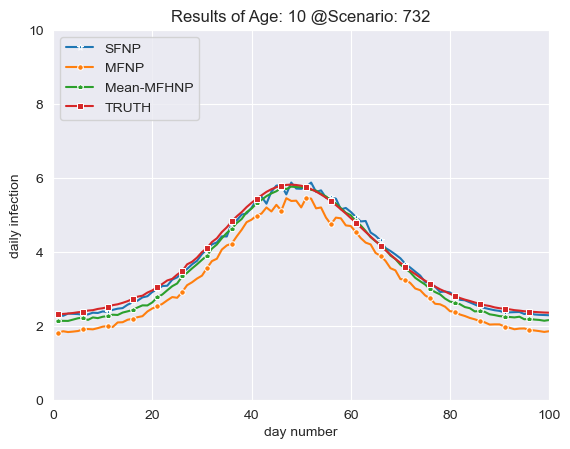

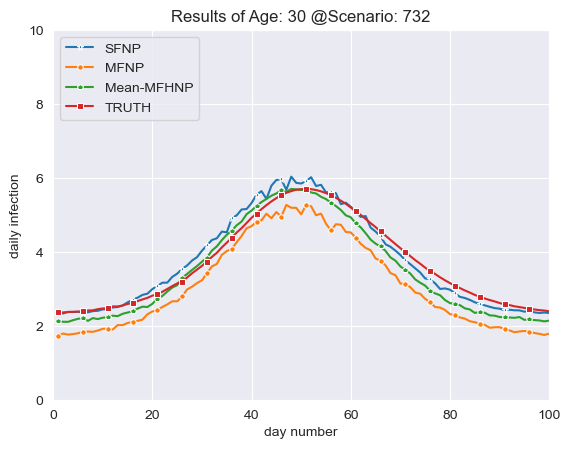

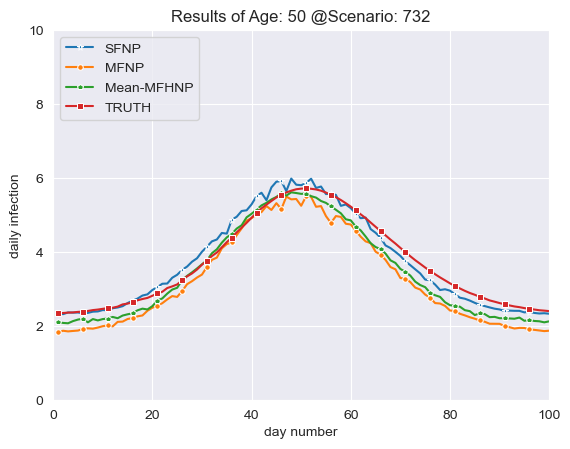

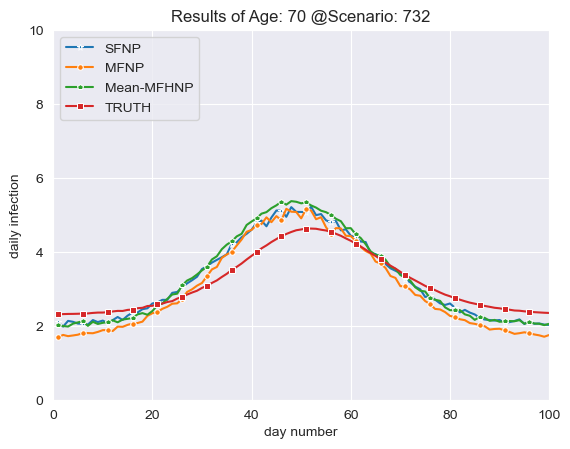

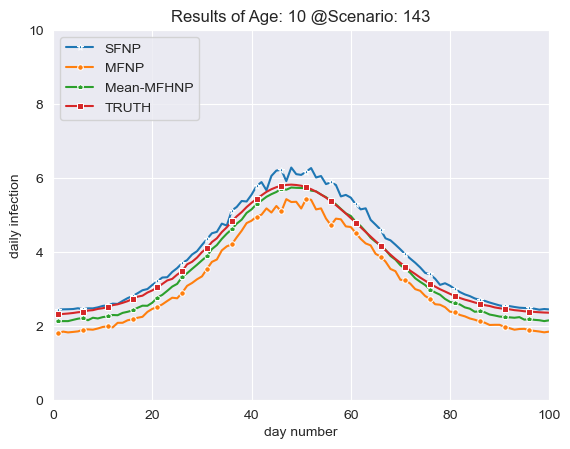

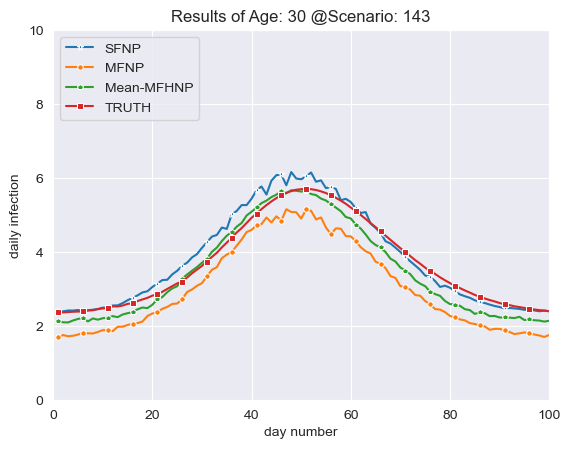

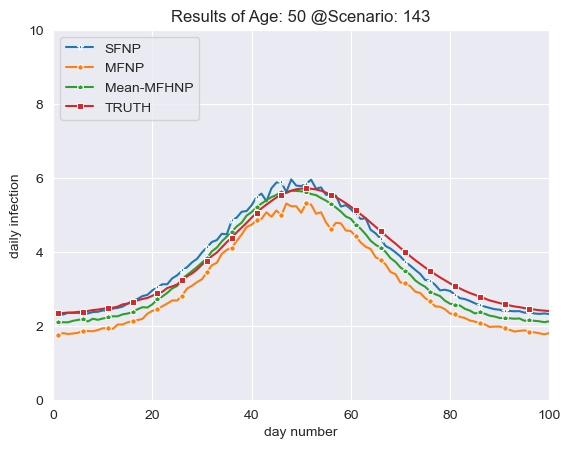

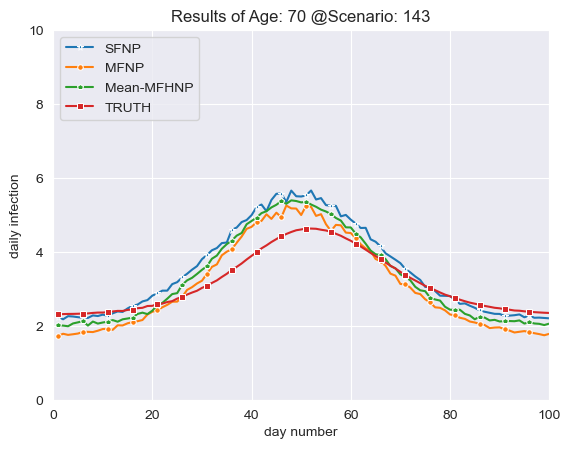

In [35]:
for i in range(2):
    s = random.randint(0, 1559)
    for j in [10, 30, 50, 70]:
        rand_multi_plot(sfnp, mfnp, [], mmfhnp, j, s, i+1)
                    

In [28]:
nargp = np.load("/Users/suchetavp/Documents/Github/hier-neural-proc/sir_gp/nargp_mean.npy")
sfgp = np.load("/Users/suchetavp/Documents/Github/hier-neural-proc/sir_gp/sfgp_mean.npy")
print("NARGP: ", end = "")
print(nargp.shape, nargp[0].shape, nargp[0][0].shape)

print("SFGP: ", end = "")
print(sfgp.shape, sfgp[0].shape, sfgp[0][0].shape)


# FOR SFGP and NARGP:
# mae, nll are a length 3 array
# mean and std is a 3x1560x8500 numpy array
# truth is a 1560x8500 numpy array

NARGP: (3, 1560, 8500) (1560, 8500) (8500,)
SFGP: (3, 1560, 8500) (1560, 8500) (8500,)


In [29]:
#truth (1560x8500, 8500 condensed to 100)
new_nargp = [0] * 100
for j in range(1560):
    for i in range(100):
        new_nargp[i] += np.average(nargp[0][j][85 * i: 85 * (i+1)])
            
new_nargp = np.divide(new_nargp, 1560)
#first, second = list(new_nargp)[:len(new_nargp)//2], list(new_nargp)[len(new_nargp)//2:]
#first.sort(), second.sort(reverse=True)
#new_nargp = first + second

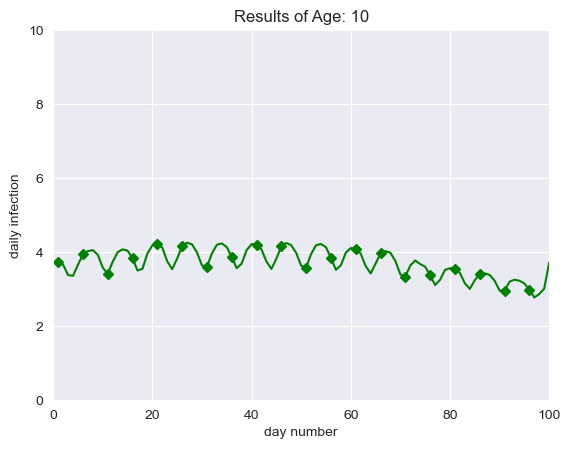

In [30]:
#age 1: 0-99, 2: 100-199, 3: 200-299, .. 9: 800-899, 10: 900-999
age = 10

    
#y = np.divide(y, nargp[0][900:1000].shape)
x = np.array([i for i in range(1,101)])
proc_map = {"NARGP": ("green", "D")}

plt.plot()
plt.title("Results of Age: " + str(age))
plt.xlabel("day number")
plt.ylabel("daily infection")

#plt.plot(x, y, marker = proc_map["NARGP"][1], color = proc_map["NARGP"][0], markevery = 5, markersize = 5)
plt.plot(x, new_nargp, marker = proc_map["NARGP"][1], color = proc_map["NARGP"][0], markevery = 5, markersize = 5)
plt.ylim(0, 10)
plt.xlim(0, 100)
plt.show()

In [31]:
#truth (1560x8500, 8500 condensed to 100)
sfgp[0].shape
new_sfgp = [0] * 100
#nargp.sort()

for j in range(1560):
    for i in range(100):
        new_sfgp[i] += np.average(sfgp[0][j][85 * i: 85 * (i+1)])


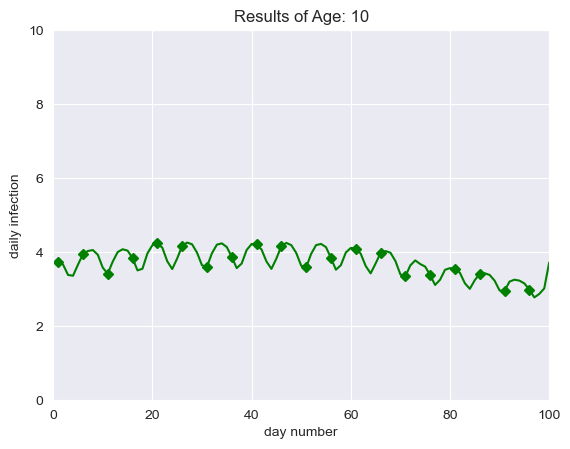

In [32]:
#age 1: 0-99, 2: 100-199, 3: 200-299, .. 9: 800-899, 10: 900-999
age = 10

new_sfgp = np.divide(new_sfgp, 1560)
x = np.array([i for i in range(1,101)])
proc_map = {"NARGP": ("green", "D")}

plt.plot()
plt.title("Results of Age: " + str(age))
plt.xlabel("day number")
plt.ylabel("daily infection")

#plt.plot(x, y, marker = proc_map["NARGP"][1], color = proc_map["NARGP"][0], markevery = 5, markersize = 5)
plt.plot(x, new_sfgp, marker = proc_map["NARGP"][1], color = proc_map["NARGP"][0], markevery = 5, markersize = 5)
plt.ylim(0, 10)
plt.xlim(0, 100)
plt.show()